<a href="https://colab.research.google.com/github/Teju42/learn-git/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project_1 : Unlocking YouTube Channel Performance Secrets


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:/Users/tejas/OneDrive/Documents/youtube_channel_real_performance_analytics - youtube_channel_real_performance_analytics.csv"

In [14]:
# ------------------------ Topic 1: Basic EDA ------------------------
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Overview:\n", df.head())

Dataset Shape: (364, 70)

Column Names: Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Im

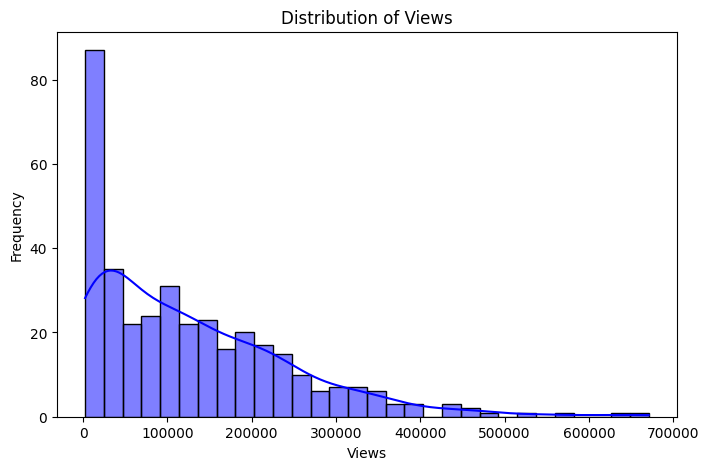

In [15]:
# Visualizing the distribution of Views
plt.figure(figsize=(8, 5))
sns.histplot(df['Views'], bins=30, kde=True, color='blue')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-f1396c17fdda>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_metrics = df.groupby('Duration_Category')[['Views', 'Watch Time (hours)', 'Estimated Revenue (USD)']].mean()



Average Performance by Duration Category:
                                Views  Watch Time (hours)  \
Duration_Category                                          
Short (<5 mins)                  NaN                 NaN   
Medium (5-15 mins)       6005.333333           20.621817   
Long (15-30 mins)       13132.333333           65.752500   
Very Long (30-60 mins)  11660.000000          101.958833   

                        Estimated Revenue (USD)  
Duration_Category                                
Short (<5 mins)                             NaN  
Medium (5-15 mins)                     0.102333  
Long (15-30 mins)                      0.426667  
Very Long (30-60 mins)                 0.050667  


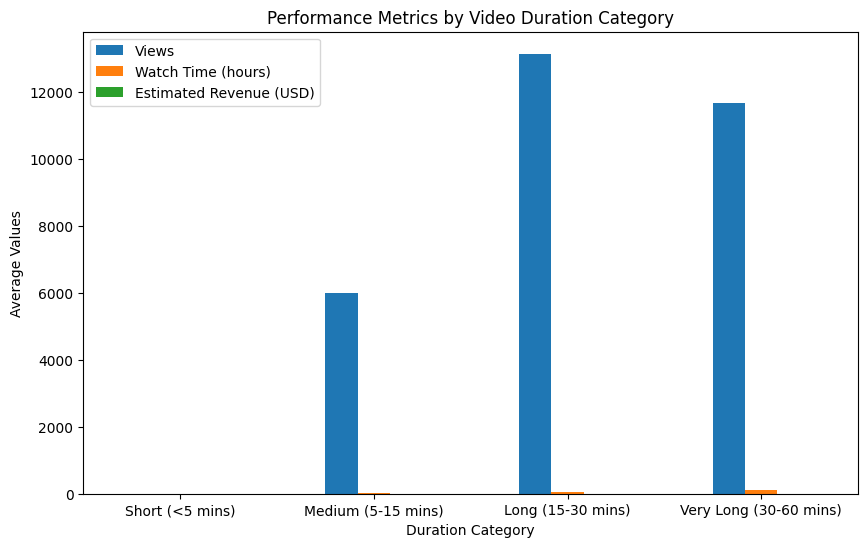

In [17]:
# ---------------- Topic 2: Video Duration vs Performance ----------------
df['Duration_Category'] = pd.cut(df['Video Duration'], bins=[0, 5, 15, 30, 60],
                                  labels=['Short (<5 mins)', 'Medium (5-15 mins)', 'Long (15-30 mins)', 'Very Long (30-60 mins)'])

performance_metrics = df.groupby('Duration_Category')[['Views', 'Watch Time (hours)', 'Estimated Revenue (USD)']].mean()
print("\nAverage Performance by Duration Category:\n", performance_metrics)

performance_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics by Video Duration Category')
plt.ylabel('Average Values')
plt.xlabel('Duration Category')
plt.xticks(rotation=0)
plt.show()



Average Metrics by Day of Week:
                      Views  Watch Time (hours)  Subscribers
Day of Week                                                
Friday       142267.037037        11058.118544   467.870370
Monday       132124.043478        10468.418752   277.282609
Saturday     122990.693878         9560.652047   299.571429
Sunday       140092.063492        10973.415119   338.158730
Thursday     110206.800000         9516.884269   245.114286
Tuesday      116269.566667         8862.573340   319.716667
Wednesday    130479.912281         9791.847530   264.701754


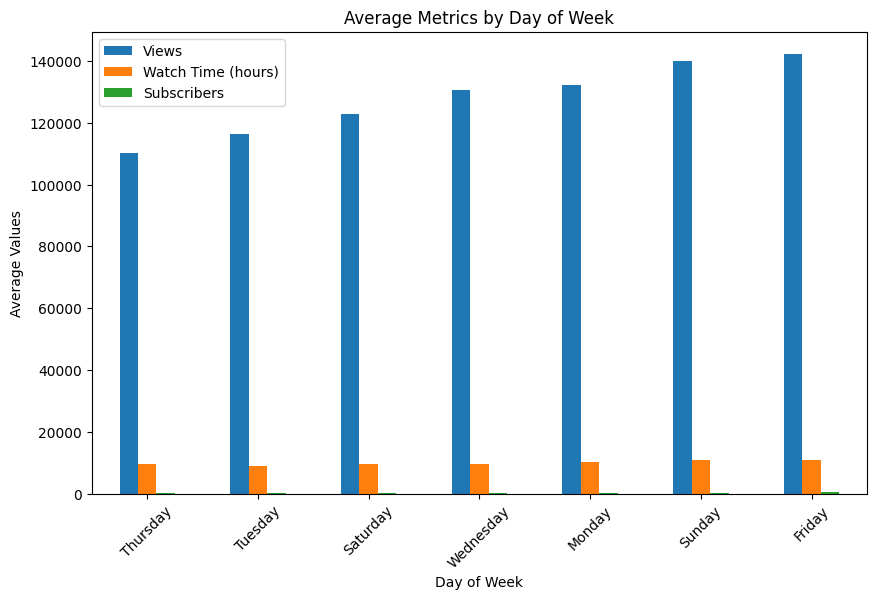

In [18]:
# ---------------- Topic 3: Best Posting Day Analysis ----------------
df['Day of Week'] = pd.to_datetime(df['Video Publish Time']).dt.day_name()

avg_metrics_by_day = df.groupby('Day of Week')[['Views', 'Watch Time (hours)', 'Subscribers']].mean()
print("\nAverage Metrics by Day of Week:\n", avg_metrics_by_day)

avg_metrics_by_day.sort_values('Views').plot(kind='bar', figsize=(10, 6))
plt.title('Average Metrics by Day of Week')
plt.ylabel('Average Values')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


Top 5 Most Engaging Videos:
       ID  Engagement
228  228       32600
142  142       23657
188  188       23007
249  249       21500
235  235       19622


<ipython-input-30-0d4b315a15ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engaging_videos, x='Engagement', y='ID', palette='coolwarm')


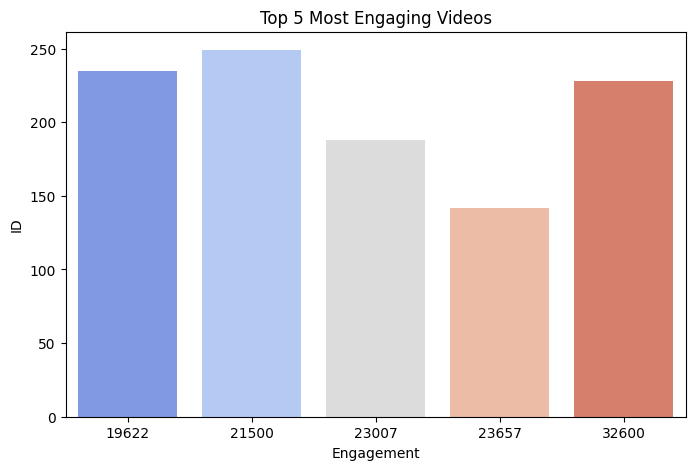

In [30]:
# ---------------- Topic 4: Most Engaging Videos ----------------
df['Engagement'] = df['Likes'] + df['Shares'] + df['New Comments']

top_engaging_videos = df[['ID', 'Engagement']].sort_values(by='Engagement', ascending=False).head(5)
print("\nTop 5 Most Engaging Videos:\n", top_engaging_videos)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_engaging_videos, x='Engagement', y='ID', palette='coolwarm')
plt.title('Top 5 Most Engaging Videos')
plt.xlabel('Engagement')
plt.ylabel('ID')
plt.show()



Top 10 Videos by Watch Time Efficiency:
       ID  Views  Watch Time (hours)  Watch Time per View
358  358   7142           1540.6736             0.215720
363  363   3890            816.1554             0.209809
361  361   8487           1657.8232             0.195337
350  350  19487           3235.4155             0.166029
44    44  22678           3584.7615             0.158072
43    43  23819           3747.2705             0.157323
273  273  73197          11496.6335             0.157064
332  332  38732           6003.0883             0.154990
344  344  30595           4687.5866             0.153214
40    40  18737           2836.5210             0.151386


<ipython-input-33-0981bf4d3c1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=efficient_videos, x='Watch Time per View', y='ID', palette='viridis')


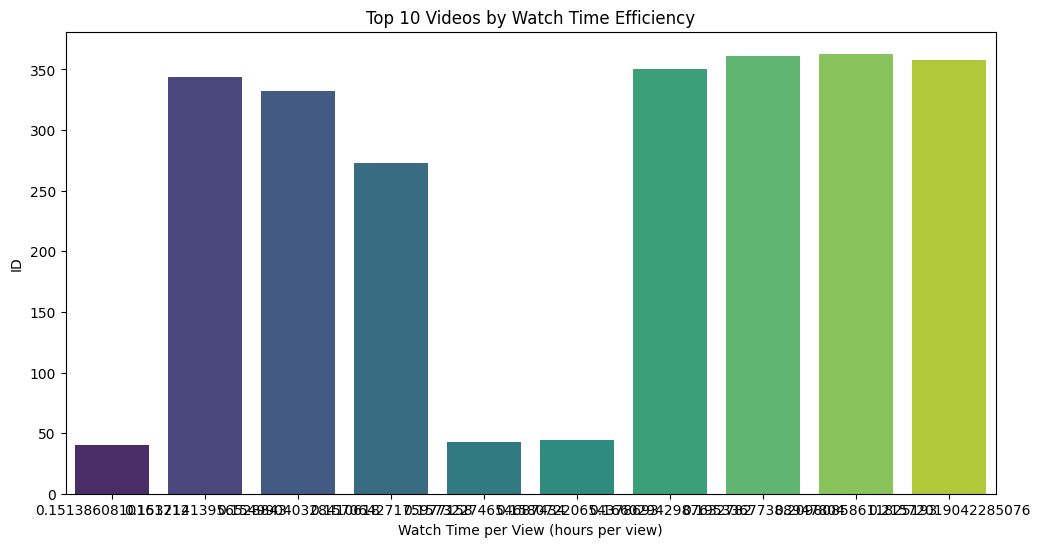

In [33]:
# ---------------- Topic 5: Watch Time Efficiency ----------------
df['Watch Time per View'] = df['Watch Time (hours)'] / df['Views']

efficient_videos = df[['ID', 'Views', 'Watch Time (hours)', 'Watch Time per View']].sort_values(by='Watch Time per View', ascending=False).head(10)
print("\nTop 10 Videos by Watch Time Efficiency:\n", efficient_videos)

plt.figure(figsize=(12, 6))
sns.barplot(data=efficient_videos, x='Watch Time per View', y='ID', palette='viridis')
plt.title('Top 10 Videos by Watch Time Efficiency')
plt.xlabel('Watch Time per View (hours per view)')
plt.ylabel('ID')
plt.show()